In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import numpy as np
import salem
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from netCDF4 import num2date

In [2]:
fchirps = '/media/ck/TOURO/WRF/RAW_WRF/d02/wrfout_compact_d02_run1983.nc'

In [3]:
#del ds
dsfull = salem.open_wrf_dataset(fchirps, decode_times=False)
small = dsfull
#del dsfull

In [5]:
varlist = ['ALBEDO', 'LH',  'HFX', 'OLR', 'PBLH',
           'PSFC' , 'Q2','QFX','PRCP','SNOWC', 
           'LWDNB', 'SWDNB','SWUPB', 'LWUPB', 'T2C', 'TH2', 'TSK', 'U10', 'V10', 'RH2', 'col_int_QVAPOR', 'col_int_QICE']

hydro = ['SFROFF', 'UDROFF', 'TR', 'RUNSB', 'RUNSF']

#LANDMASK, SST, 'LU_INDEX',

static = ["LANDMASK", "LU_INDEX", "IVGTYP", "HGT"]

In [15]:
small = small[varlist]

In [3]:
fname = '/home/ck/DIR/cornkle/data/HUARAZ/shapes/riosan_sel_one.shp'
sdf = salem.read_shapefile(fname)
sdf = salem.transform_geopandas(sdf, to_crs=salem.wgs84)

In [17]:
small_roi = small.salem.roi(shape=sdf)

KeyboardInterrupt: 

In [73]:
csmall = small.rename({'south_north' : 'latitude', 'west_east' : 'longitude'})

In [74]:
csmall = csmall.assign_coords({'latitude' : new_lat, 'longitude' : new_lon})

In [77]:
csmall = csmall.assign_coords({'south_north' : south_north, 'west_east' : west_east})

In [78]:
csmall

<xarray.Dataset>
Dimensions:         (latitude: 93, longitude: 87, south_north: 93, time: 9553, west_east: 87)
Coordinates:
    xtime           (time) float32 4.075488e+17 4.0755244e+17 ... 4.41936e+17
    lat             (latitude, longitude) float32 -10.824516 ... -7.4960403
    lon             (latitude, longitude) float32 -79.47869 ... -76.32662
  * time            (time) datetime64[ns] 1982-12-01 ... 1984-01-03
  * longitude       (longitude) float32 -79.47869 -79.44204 ... -76.32662
  * latitude        (latitude) float32 -10.824516 -10.788528 ... -7.4960403
  * south_north     (south_north) float64 -1.188e+06 -1.184e+06 ... -8.204e+05
  * west_east       (west_east) float64 -1.72e+05 -1.68e+05 ... 1.72e+05
Data variables:
    ALBEDO          (time, latitude, longitude) float32 nan nan nan ... nan nan
    LANDMASK        (time, latitude, longitude) float32 nan nan nan ... nan nan
    LH              (time, latitude, longitude) float32 nan nan nan ... nan nan
    LU_INDEX        (time, latitude, longitude) float32 nan nan nan ... nan nan
    HFX             (time, latitude, longitude) float32 nan nan nan ... nan nan
    HGT             (time, latitude, longitude) float32 nan nan nan ... nan nan
    IVGTYP          (time, latitude, longitude) float64 nan nan nan ... nan nan
    LWDNB           (time, latitude, longitude) float32 nan nan nan ... nan nan
    LWUPB           (time, latitude, longitude) float32 nan nan nan ... nan nan
    MUB             (time, latitude, longitude) float32 nan nan nan ... nan nan
    OLR             (time, latitude, longitude) float32 nan nan nan ... nan nan
    PBLH            (time, latitude, longitude) float32 nan nan nan ... nan nan
    PSFC            (time, latitude, longitude) float32 nan nan nan ... nan nan
    Q2              (time, latitude, longitude) float32 nan nan nan ... nan nan
    Q2B             (time, latitude, longitude) float32 nan nan nan ... nan nan
    Q2V             (time, latitude, longitude) float32 nan nan nan ... nan nan
    QFX             (time, latitude, longitude) float32 nan nan nan ... nan nan
    QIN             (time, latitude, longitude) float32 nan nan nan ... nan nan
    QRFS            (time, latitude, longitude) float32 nan nan nan ... nan nan
    QSLAT           (time, latitude, longitude) float32 nan nan nan ... nan nan
    RAINNC          (time, latitude, longitude) float32 nan nan nan ... nan nan
    RAINSH          (time, latitude, longitude) float32 nan nan nan ... nan nan
    RUNSB           (time, latitude, longitude) float32 nan nan nan ... nan nan
    RUNSF           (time, latitude, longitude) float32 nan nan nan ... nan nan
    SFROFF          (time, latitude, longitude) float32 nan nan nan ... nan nan
    SMCWTD          (time, latitude, longitude) float32 nan nan nan ... nan nan
    SNOALB          (time, latitude, longitude) float32 nan nan nan ... nan nan
    SNOW            (time, latitude, longitude) float32 nan nan nan ... nan nan
    SNOWC           (time, latitude, longitude) float32 nan nan nan ... nan nan
    SST             (time, latitude, longitude) float32 nan nan nan ... nan nan
    SWDNB           (time, latitude, longitude) float32 nan nan nan ... nan nan
    SWNORM          (time, latitude, longitude) float32 nan nan nan ... nan nan
    SWUPB           (time, latitude, longitude) float32 nan nan nan ... nan nan
    T2              (time, latitude, longitude) float32 nan nan nan ... nan nan
    TH2             (time, latitude, longitude) float32 nan nan nan ... nan nan
    TR              (time, latitude, longitude) float32 nan nan nan ... nan nan
    TSK             (time, latitude, longitude) float32 nan nan nan ... nan nan
    U10             (time, latitude, longitude) float32 nan nan nan ... nan nan
    UDROFF          (time, latitude, longitude) float32 nan nan nan ... nan nan
    V10             (time, latitude, longitude) float32 nan nan nan ... nan nan
    VEGFRA          (time, latitude, longitude) float32 nan na

In [54]:
new_lat = small['lat'].data[:,0]
new_lon = small['lon'].data[0,:]

In [46]:
small

NameError: name 'small' is not defined

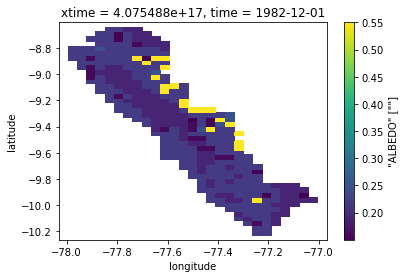

In [99]:
csmall['ALBEDO'].isel(time=0).sel(latitude=slice(-10.25,-8.6), longitude=slice(-78.02, -76.98)).plot()

In [100]:
del csmall

In [101]:
del ds

In [4]:
##static
import glob
import ipdb
import os

fname = '/home/ck/DIR/cornkle/data/HUARAZ/shapes/riosan_sel_one.shp'
sdf = salem.read_shapefile(fname)
sdf = salem.transform_geopandas(sdf, to_crs=salem.wgs84)

outp = '/home/ck/rio_santa/'

ds_list = []
disk_path = '/media/ck/TOURO/WRF/RAW_WRF/d02/*.nc'

ds = salem.open_wrf_dataset(glob.glob(disk_path)[0], decode_times=False).isel(time=5)
ds = ds[static]
new_lat = ds['lat'].data[:,0]
new_lon = ds['lon'].data[0,:]
south_north = ds['south_north']
west_east = ds['west_east']

ds = ds.rename({'south_north' : 'latitude', 'west_east' : 'longitude'})
ds = ds.assign_coords({'latitude' : new_lat, 'longitude' : new_lon})
ds = ds.assign_coords({'south_north' : ('latitude', south_north),'west_east' : ('longitude',west_east)})

ds = ds.sel(latitude=slice(-10.25,-8.6), longitude=slice(-78.02, -76.98))
#ipdb.set_trace()
dsout = ds.salem.roi(shape=sdf)
    
dsout = dsout.drop('xtime')

comp = dict(zlib=True, complevel=5)
encoding = {var: comp for var in dsout.data_vars}

dsout.to_netcdf(outp+'wrf_d02_statics.nc', mode='w', encoding=encoding, format='NETCDF4')
print(outp+fbase, 'written')                                                                  
#ds_list.append(dsout)
del ds

/home/ck/rio_santa/ written


In [7]:
import glob
import ipdb
import os

fname = '/home/ck/DIR/cornkle/data/HUARAZ/shapes/riosan_sel_one.shp'
sdf = salem.read_shapefile(fname)
sdf = salem.transform_geopandas(sdf, to_crs=salem.wgs84)

outp = '/home/ck/rio_santa/'

ds_list = []
disk_path = '/media/ck/TOURO/WRF/RAW_WRF/d02/*.nc'
for f in glob.glob(disk_path):
    print('Doing', f)
    fbase = os.path.basename(f)
#     if os.path.isfile(outp + fbase):
#         print('File exists, continue')
#         continue
    ds = salem.open_wrf_dataset(f, decode_times=False)
    ds = ds[hydro]
    new_lat = ds['lat'].data[:,0]
    new_lon = ds['lon'].data[0,:]
    south_north = ds['south_north']
    west_east = ds['west_east']
    
    ds = ds.rename({'south_north' : 'latitude', 'west_east' : 'longitude'})
    ds = ds.assign_coords({'latitude' : new_lat, 'longitude' : new_lon})
    ds = ds.assign_coords({'south_north' : ('latitude', south_north),'west_east' : ('longitude',west_east)})
    
    ds = ds.sel(latitude=slice(-10.25,-8.6), longitude=slice(-78.02, -76.98))
    #ipdb.set_trace()
    dsout = ds.salem.roi(shape=sdf)
    
    #ipdb.set_trace()
#     new_time=[]
#     for t in dsout.time:
#         ipdb.set_trace()
#         ot = pd.to_datetime(t.values, format="%Y-%m-%d_%H:%M:%S")
#         new_time.append(ot)
#     dsout = dsout.assign_coords({'time' : new_time})
    dsout = dsout.drop('xtime')
    #dsout = dsout.assign_coords({'time' : ttime.values})
    comp = dict(zlib=True, complevel=5)
    encoding = {var: comp for var in dsout.data_vars}
    fbase = fbase.replace('.nc', '_hydro.nc')
    dsout.to_netcdf(outp+fbase, mode='w', encoding=encoding, format='NETCDF4')
    print(outp+fbase, 'written')                                                                  
    #ds_list.append(dsout)
    del ds

Doing /media/ck/TOURO/WRF/RAW_WRF/d02/wrfout_compact_d02_run1993.nc
/home/ck/rio_santa/wrfout_compact_d02_run1993_hydro.nc written
Doing /media/ck/TOURO/WRF/RAW_WRF/d02/wrfout_compact_d02_run1980.nc
/home/ck/rio_santa/wrfout_compact_d02_run1980_hydro.nc written
Doing /media/ck/TOURO/WRF/RAW_WRF/d02/wrfout_compact_d02_run1981.nc
/home/ck/rio_santa/wrfout_compact_d02_run1981_hydro.nc written
Doing /media/ck/TOURO/WRF/RAW_WRF/d02/wrfout_compact_d02_run1982.nc
/home/ck/rio_santa/wrfout_compact_d02_run1982_hydro.nc written
Doing /media/ck/TOURO/WRF/RAW_WRF/d02/wrfout_compact_d02_run1983.nc
/home/ck/rio_santa/wrfout_compact_d02_run1983_hydro.nc written
Doing /media/ck/TOURO/WRF/RAW_WRF/d02/wrfout_compact_d02_run1984.nc
/home/ck/rio_santa/wrfout_compact_d02_run1984_hydro.nc written
Doing /media/ck/TOURO/WRF/RAW_WRF/d02/wrfout_compact_d02_run1985.nc
/home/ck/rio_santa/wrfout_compact_d02_run1985_hydro.nc written
Doing /media/ck/TOURO/WRF/RAW_WRF/d02/wrfout_compact_d02_run1986.nc
/home/ck/rio_sa

In [21]:
xr.concat(ds_list, dim='time').to_netcdf('/media/ck/Elements/SouthAmerica/WRF/RAW_WRF/test.nc')

In [22]:
ds_list[0].time

<xarray.DataArray 'time' (time: 9553)>
array(['1992-12-01T00:00:00.000000000', '1992-12-01T01:00:00.000000000',
       '1992-12-01T02:00:00.000000000', ..., '1994-01-02T22:00:00.000000000',
       '1994-01-02T23:00:00.000000000', '1994-01-03T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1992-12-01 1992-12-01T01:00:00 ... 1994-01-03

In [34]:
test = xr.open_dataset('/home/ck/rio_santa/wrfout_compact_d02_run1987.nc')

In [36]:
test

<xarray.Dataset>
Dimensions:         (latitude: 46, longitude: 29, time: 9553)
Coordinates:
    lat             (latitude, longitude) float32 -10.247986 ... -8.62101
    lon             (latitude, longitude) float32 -78.01261 ... -76.98636
  * time            (time) datetime64[ns] 1986-12-01 ... 1988-01-03
  * longitude       (longitude) float32 -78.01261 -77.97596 ... -76.98636
  * latitude        (latitude) float32 -10.247986 -10.211914 ... -8.62101
    south_north     (latitude) float64 -1.124e+06 -1.12e+06 ... -9.444e+05
    west_east       (longitude) float64 -1.2e+04 -8e+03 -4e+03 ... 9.6e+04 1e+05
Data variables:
    ALBEDO          (time, latitude, longitude) float32 ...
    LH              (time, latitude, longitude) float32 ...
    HFX             (time, latitude, longitude) float32 ...
    OLR             (time, latitude, longitude) float32 ...
    PBLH            (time, latitude, longitude) float32 ...
    PSFC            (time, latitude, longitude) float32 ...
    Q2              (time, latitude, longitude) float32 ...
    QFX             (time, latitude, longitude) float32 ...
    PRCP            (time, latitude, longitude) float32 ...
    SNOWC           (time, latitude, longitude) float32 ...
    LWDNB           (time, latitude, longitude) float32 ...
    SWDNB           (time, latitude, longitude) float32 ...
    SWUPB           (time, latitude, longitude) float32 ...
    LWUPB           (time, latitude, longitude) float32 ...
    T2C             (time, latitude, longitude) float32 ...
    TH2             (time, latitude, longitude) float32 ...
    TSK             (time, latitude, longitude) float32 ...
    U10             (time, latitude, longitude) float32 ...
    V10             (time, latitude, longitude) float32 ...
    RH2             (time, latitude, longitude) float32 ...
    col_int_QVAPOR  (time, latitude, longitude) float32 ...
    col_int_QICE    (time, latitude, longitude) float32 ...
Attributes:
    TITLE:                            OUTPUT FROM WRF V3.8.1 MODEL
    START_DATE:                      1986-12-01_00:00:00
    SIMULATION_START_DATE:           1986-12-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        88
    SOUTH-NORTH_GRID_DIMENSION:      94
    BOTTOM-TOP_GRID_DIMENSION:       35
    DX:                              4000.0
    DY:                              4000.0
    SKEBS_ON:                        0
    SPEC_BDY_FINAL_MU:               1
    USE_Q_DIABATIC:                  0
    GRIDTYPE:                        C
    DIFF_OPT:                        2
    KM_OPT:                          4
    DAMP_OPT:                        3
    DAMPCOEF:                        0.2
    KHDIF:                           0.0
    KVDIF:                           0.0
    MP_PHYSICS:                      10
    RA_LW_PHYSICS:                   3
    RA_SW_PHYSICS:                   3
    SF_SFCLAY_PHYSICS:               1
    SF_SURFACE_PHYSICS:              4
    BL_PBL_PHYSICS:                  5
    CU_PHYSICS:                      0
    SF_LAKE_PHYSICS:                 0
    SURFACE_INPUT_SOURCE:            1
    SST_UPDATE:                      1
    GRID_FDDA:                       0
    GFDDA_INTERVAL_M:                0
    GFDDA_END_H:                     0
    GRID_SFDDA:                      0
    SGFDDA_INTERVAL_M:               0
    SGFDDA_END_H:                    0
    HYPSOMETRIC_OPT:                 2
    USE_THETA_M:                     0
    SF_URBAN_PHYSICS:                0
    SHCU_PHYSICS:                    0
    MFSHCONV:                        0
    FEEDBACK:                        0
    SMOOTH_OPTION:                   0
    SWRAD_SCAT:                      1.0
    W_DAMPING:                       0
    ADAPT_DT_START:                  24.0
    ADAPT_DT_MAX:                    48.0
    ADAPT_DT_MIN:                    12.0
    RADT:                            4.0
    BLDT:                            0.0
    CUDT:                            0.0
    AER_OPT:                

In [37]:
out

<xarray.Dataset>
Dimensions:      (Time: 14245, latitude: 46, longitude: 29)
Coordinates:
  * latitude     (latitude) float32 -10.247986 -10.211914 ... -8.657249 -8.62101
  * longitude    (longitude) float32 -78.01261 -77.97596 ... -77.02301 -76.98636
    lat          (latitude, longitude) float32 -10.247986 ... -8.62101
    lon          (latitude, longitude) float32 -78.01261 -77.97596 ... -76.98636
  * Time         (Time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31
    month        (Time) int64 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12
    south_north  (latitude) int64 16 17 18 19 20 21 22 ... 55 56 57 58 59 60 61
    west_east    (longitude) int64 40 41 42 43 44 45 46 ... 62 63 64 65 66 67 68
Data variables:
    RAINNC       (Time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    TITLE:                            OUTPUT FROM WRF V3.8.1 MODEL
    START_DATE:                      1982-12-01_00:00:00
    SIMULATION_START_DATE:           1982-12-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        88
    SOUTH-NORTH_GRID_DIMENSION:      94
    BOTTOM-TOP_GRID_DIMENSION:       35
    DX:                              4000.0
    DY:                              4000.0
    SKEBS_ON:                        0
    SPEC_BDY_FINAL_MU:               1
    USE_Q_DIABATIC:                  0
    GRIDTYPE:                        C
    DIFF_OPT:                        2
    KM_OPT:                          4
    DAMP_OPT:                        3
    DAMPCOEF:                        0.2
    KHDIF:                           0.0
    KVDIF:                           0.0
    MP_PHYSICS:                      10
    RA_LW_PHYSICS:                   3
    RA_SW_PHYSICS:                   3
    SF_SFCLAY_PHYSICS:               1
    SF_SURFACE_PHYSICS:              4
    BL_PBL_PHYSICS:                  5
    CU_PHYSICS:                      0
    SF_LAKE_PHYSICS:                 0
    SURFACE_INPUT_SOURCE:            1
    SST_UPDATE:                      1
    GRID_FDDA:                       0
    GFDDA_INTERVAL_M:                0
    GFDDA_END_H:                     0
    GRID_SFDDA:                      0
    SGFDDA_INTERVAL_M:               0
    SGFDDA_END_H:                    0
    HYPSOMETRIC_OPT:                 2
    USE_THETA_M:                     0
    SF_URBAN_PHYSICS:                0
    SHCU_PHYSICS:                    0
    MFSHCONV:                        0
    FEEDBACK:                        0
    SMOOTH_OPTION:                   0
    SWRAD_SCAT:                      1.0
    W_DAMPING:                       0
    ADAPT_DT_START:                  24.0
    ADAPT_DT_MAX:                    48.0
    ADAPT_DT_MIN:                    12.0
    RADT:                            4.0
    BLDT:                            0.0
    CUDT:                            0.0
    AER_OPT:                         0
    SWINT_OPT:                       0
    AER_TYPE:                        1
    AER_AOD550_OPT:                  1
    AER_ANGEXP_OPT:                  1
    AER_SSA_OPT:                     1
    AER_ASY_OPT:                     1
    AER_AOD550_VAL:                  0.12
    AER_ANGEXP_VAL:                  1.3
    AER_SSA_VAL:                     1e-45
    AER_ASY_VAL:                     1e-45
    MOIST_ADV_OPT:                   1
    SCALAR_ADV_OPT:                  1
    TKE_ADV_OPT:                     1
    DIFF_6TH_OPT:                    2
    DIFF_6TH_FACTOR:                 0.12
    OBS_NUDGE_OPT:                   0
    BUCKET_MM:                       -1.0
    BUCKET_J:                        -1.0
    PREC_ACC_DT:                     0.0
    SF_OCEAN_PHYSICS:                0
    ISFTCFLX:                        0
    ISHALLOW:                        0
    ISFFLX:                          1
    ICLOUD:                          1
    ICLOUD_CU:                       0
    TRACER_PBLMIX:                   1
    SCALAR_PBLMIX:                   0
    YSU_TOPDOWN_PBLMIX:              0
  

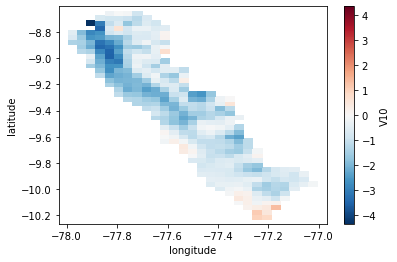

In [33]:
(test.salem.roi(shape=sdf))['V10'].mean('time').plot()

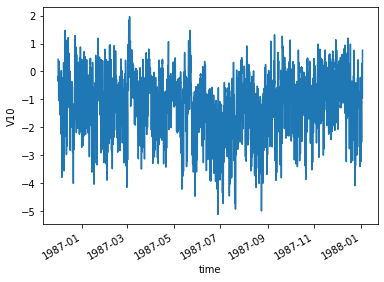

In [31]:
(test['V10'].mean(['latitude', 'longitude'])).plot()

In [58]:
bc_file = '/media/ck/TOURO/WRF/BC_WRF/precip_finalcorrection_fixed_a_monthly_daily_d03_noamazon.nc'

In [59]:
bc = xr.open_dataset(bc_file)

In [64]:
dsfull['lat'][1::,0].values-dsfull['lat'][0:-1,0].values

array([0.03598785, 0.03601074, 0.03601837, 0.03601074, 0.03601837,
       0.036026  , 0.036026  , 0.03603363, 0.03603363, 0.03604126,
       0.03604126, 0.03604889, 0.03604889, 0.03605652, 0.03606415,
       0.03606415, 0.03607178, 0.03607178, 0.03607941, 0.03607941,
       0.03609467, 0.03607941, 0.03610229, 0.03609467, 0.03610229,
       0.03610229, 0.03610992, 0.03611755, 0.03611755, 0.03611755,
       0.03612518, 0.03612518, 0.03614044, 0.03613281, 0.03614044,
       0.03614807, 0.03614044, 0.0361557 , 0.0361557 , 0.03616333,
       0.0361557 , 0.03617859, 0.03617096, 0.03617096, 0.03617859,
       0.03617859, 0.03618622, 0.03618622, 0.03619385, 0.03620148,
       0.03620148, 0.03620148, 0.03620911, 0.03620911, 0.03621674,
       0.03622437, 0.03620911, 0.03623962, 0.03622437, 0.03623199,
       0.03623962, 0.03623199, 0.03624725, 0.03624725, 0.03624725,
       0.03624725, 0.03626251, 0.03626251, 0.03626251, 0.03627014,
       0.03626251, 0.03627777, 0.03627777, 0.03627777, 0.03628

In [44]:
bc

<xarray.Dataset>
Dimensions:  (Time: 14245, south_north: 93, west_east: 87)
Coordinates:
    lat      (south_north, west_east) float32 ...
    lon      (south_north, west_east) float32 ...
  * Time     (Time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31
    month    (Time) int64 ...
Dimensions without coordinates: south_north, west_east
Data variables:
    RAINNC   (Time, south_north, west_east) float32 ...

In [17]:
def replace_coord(f, fullds):
    fname = '/home/ck/DIR/cornkle/data/HUARAZ/shapes/riosan_sel_one.shp'
    sdf = salem.read_shapefile(fname)
    sdf = salem.transform_geopandas(sdf, to_crs=salem.wgs84)
    
    ds = xr.open_dataset(f)

    ds.attrs = fullds.attrs
    ds = ds.salem.roi(shape=sdf)
    new_lat = ds['lat'].data[:,0]
    new_lon = ds['lon'].data[0,:]
    south_north = ds['south_north']
    west_east = ds['west_east']
    
    ds = ds.rename({'south_north' : 'latitude', 'west_east' : 'longitude', 'Time':'time'})
    ds = ds.assign_coords({'latitude' : new_lat, 'longitude' : new_lon})
    ds = ds.assign_coords({'south_north' : ('latitude', fullds.south_north),'west_east' : ('longitude',fullds.west_east)})
    
     #['pyproj_srs'] = '+proj=merc +lat_ts=-11 +lon_0=-77.9026565551758 +x_0=0 +y_0=0 +R=6370000 +units=m +no_defs' 
    
    dsout = ds.sel(latitude=slice(-10.25,-8.6), longitude=slice(-78.02, -76.98))

    #
    
    #dsout.attrs = ds.attrs

    #dsout = dsout.drop('xtime')
    
    return dsout

In [39]:
out = replace_coord(bc_file, ['RAINNC'], dsfull)

NameError: name 'bc_file' is not defined

In [48]:
out

<xarray.Dataset>
Dimensions:      (latitude: 46, longitude: 29, time: 14245)
Coordinates:
  * latitude     (latitude) float32 -10.247986 -10.211914 ... -8.657249 -8.62101
  * longitude    (longitude) float32 -78.01261 -77.97596 ... -77.02301 -76.98636
    lat          (latitude, longitude) float32 -10.247986 ... -8.62101
    lon          (latitude, longitude) float32 -78.01261 -77.97596 ... -76.98636
  * time         (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31
    month        (time) int64 ...
    south_north  (latitude) float64 -1.124e+06 -1.12e+06 ... -9.444e+05
    west_east    (longitude) float64 -1.2e+04 -8e+03 -4e+03 ... 9.6e+04 1e+05
Data variables:
    RAINNC       (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    TITLE:                            OUTPUT FROM WRF V3.8.1 MODEL
    START_DATE:                      1982-12-01_00:00:00
    SIMULATION_START_DATE:           1982-12-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        88
    SOUTH-NORTH_GRID_DIMENSION:      94
    BOTTOM-TOP_GRID_DIMENSION:       35
    DX:                              4000.0
    DY:                              4000.0
    SKEBS_ON:                        0
    SPEC_BDY_FINAL_MU:               1
    USE_Q_DIABATIC:                  0
    GRIDTYPE:                        C
    DIFF_OPT:                        2
    KM_OPT:                          4
    DAMP_OPT:                        3
    DAMPCOEF:                        0.2
    KHDIF:                           0.0
    KVDIF:                           0.0
    MP_PHYSICS:                      10
    RA_LW_PHYSICS:                   3
    RA_SW_PHYSICS:                   3
    SF_SFCLAY_PHYSICS:               1
    SF_SURFACE_PHYSICS:              4
    BL_PBL_PHYSICS:                  5
    CU_PHYSICS:                      0
    SF_LAKE_PHYSICS:                 0
    SURFACE_INPUT_SOURCE:            1
    SST_UPDATE:                      1
    GRID_FDDA:                       0
    GFDDA_INTERVAL_M:                0
    GFDDA_END_H:                     0
    GRID_SFDDA:                      0
    SGFDDA_INTERVAL_M:               0
    SGFDDA_END_H:                    0
    HYPSOMETRIC_OPT:                 2
    USE_THETA_M:                     0
    SF_URBAN_PHYSICS:                0
    SHCU_PHYSICS:                    0
    MFSHCONV:                        0
    FEEDBACK:                        0
    SMOOTH_OPTION:                   0
    SWRAD_SCAT:                      1.0
    W_DAMPING:                       0
    ADAPT_DT_START:                  24.0
    ADAPT_DT_MAX:                    48.0
    ADAPT_DT_MIN:                    12.0
    RADT:                            4.0
    BLDT:                            0.0
    CUDT:                            0.0
    AER_OPT:                         0
    SWINT_OPT:                       0
    AER_TYPE:                        1
    AER_AOD550_OPT:                  1
    AER_ANGEXP_OPT:                  1
    AER_SSA_OPT:                     1
    AER_ASY_OPT:                     1
    AER_AOD550_VAL:                  0.12
    AER_ANGEXP_VAL:                  1.3
    AER_SSA_VAL:                     1e-45
    AER_ASY_VAL:                     1e-45
    MOIST_ADV_OPT:                   1
    SCALAR_ADV_OPT:                  1
    TKE_ADV_OPT:                     1
    DIFF_6TH_OPT:                    2
    DIFF_6TH_FACTOR:                 0.12
    OBS_NUDGE_OPT:                   0
    BUCKET_MM:                       -1.0
    BUCKET_J:                        -1.0
    PREC_ACC_DT:                     0.0
    SF_OCEAN_PHYSICS:                0
    ISFTCFLX:                        0
    ISHALLOW:                        0
    ISFFLX:                          1
    ICLOUD:                          1
    ICLOUD_CU:                       0
    TRACER_PBLMIX:                   1
    SCALAR_PBLMIX:                   0
    YSU_TOPDOWN_PBLMIX:              0
    GRAV_SETTLING:                   0
    OPT_SFC:         

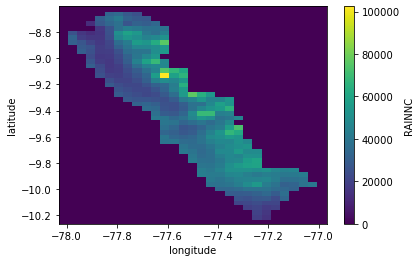

In [50]:
(out.salem.roi(shape=sdf))['RAINNC'].sum('time').plot()

In [15]:
import glob
bcfiles = glob.glob('/media/ck/TOURO/WRF/BC_WRF/*_d02.nc')

In [19]:
bcfiles

['/media/ck/TOURO/WRF/BC_WRF/precip_finalcorrection_fixed_a_monthly_daily_d02.nc',
 '/media/ck/TOURO/WRF/BC_WRF/Tmax_finalcorrection_fixed_a_monthly_daily_d02.nc',
 '/media/ck/TOURO/WRF/BC_WRF/Tmin_finalcorrection_variable_a_monthly_daily_d02.nc']

In [23]:
for bf in bcfiles[1::]:
    out = replace_coord(bf, dsfull)
    
    comp = dict(zlib=True, complevel=5)
    encoding = {var: comp for var in out.data_vars}
    outpath = bf.replace('.nc', '_RioSanta.nc')
    out.to_netcdf(outpath, mode='w', encoding=encoding, format='NETCDF4')

In [5]:
huaraz_loc =  [-77.4509, -9.5132]

In [6]:
import glob

In [7]:
testwrf = xr.open_dataset(glob.glob('/home/ck/rio_santa/*.nc')[0])

In [27]:
testwrf['ALBEDO'].sel(time=testwrf['time.month']==1).mean('time').plot()

KeyboardInterrupt: 

In [65]:
# station point
#path = glob.glob('/home/ck/rio_santa/*.nc')
ds_merge = []
for yy in range(1980,2020):
    try:
        all_wrf = xr.open_dataset('/home/ck/rio_santa/wrfout_compact_d02_run'+str(yy)+'.nc')
    except:
        all_wrf = xr.open_dataset('/home/ck/rio_santa/wrfout_compact_d02_run'+str(yy)+'_20.nc')
    ts = all_wrf.sel(latitude=huaraz_loc[1], longitude=huaraz_loc[0], method='nearest')
    if yy != 2019:
        ts = ts.sel(time=(ts['time.year']==yy))
    else:
        ts = ts.sel(time=((ts['time.year']==yy) | (ts['time.year']==2020)))
    if yy == 1980:
        ts_full = ts.copy(deep=True)
    else:
        ts_full = xr.concat([ts_full,ts], dim='time')
        
    comp = dict(zlib=True, complevel=5)
    encoding = {var: comp for var in ts_full.data_vars}
    
    ts_full.to_netcdf('/home/ck/rio_santa/timeseries/wrfout_fullTS_77W9S_d02.nc', mode='w', encoding=encoding, format='NETCDF4')
        
    del all_wrf

In [8]:
snowmask = (testwrf['SNOWC'].sel(time=testwrf['time.month']==8).mean('time'))<0.8

In [67]:
# station point
#path = glob.glob('/home/ck/rio_santa/*.nc')
ds_merge = []
for yy in range(1980,2020):
    try:
        all_wrf = xr.open_dataset('/home/ck/rio_santa/wrfout_compact_d02_run'+str(yy)+'.nc')
    except:
        all_wrf = xr.open_dataset('/home/ck/rio_santa/wrfout_compact_d02_run'+str(yy)+'_20.nc')
    ts = all_wrf.where(snowmask).mean(['latitude', 'longitude'])
    if yy != 2019:
        ts = ts.sel(time=(ts['time.year']==yy))
    else:
        ts = ts.sel(time=((ts['time.year']==yy) | (ts['time.year']==2020)))
    if yy == 1980:
        ts_full = ts.copy(deep=True)
    else:
        ts_full = xr.concat([ts_full,ts], dim='time')
        
    comp = dict(zlib=True, complevel=5)
    encoding = {var: comp for var in ts_full.data_vars}
    
    
        
    del all_wrf
ts_full.to_netcdf('/home/ck/rio_santa/timeseries/wrfout_fullTS_fullValley_snowmask_d02.nc', mode='w', encoding=encoding, format='NETCDF4')

In [101]:
testwrf = testwrf.where(snowmask)

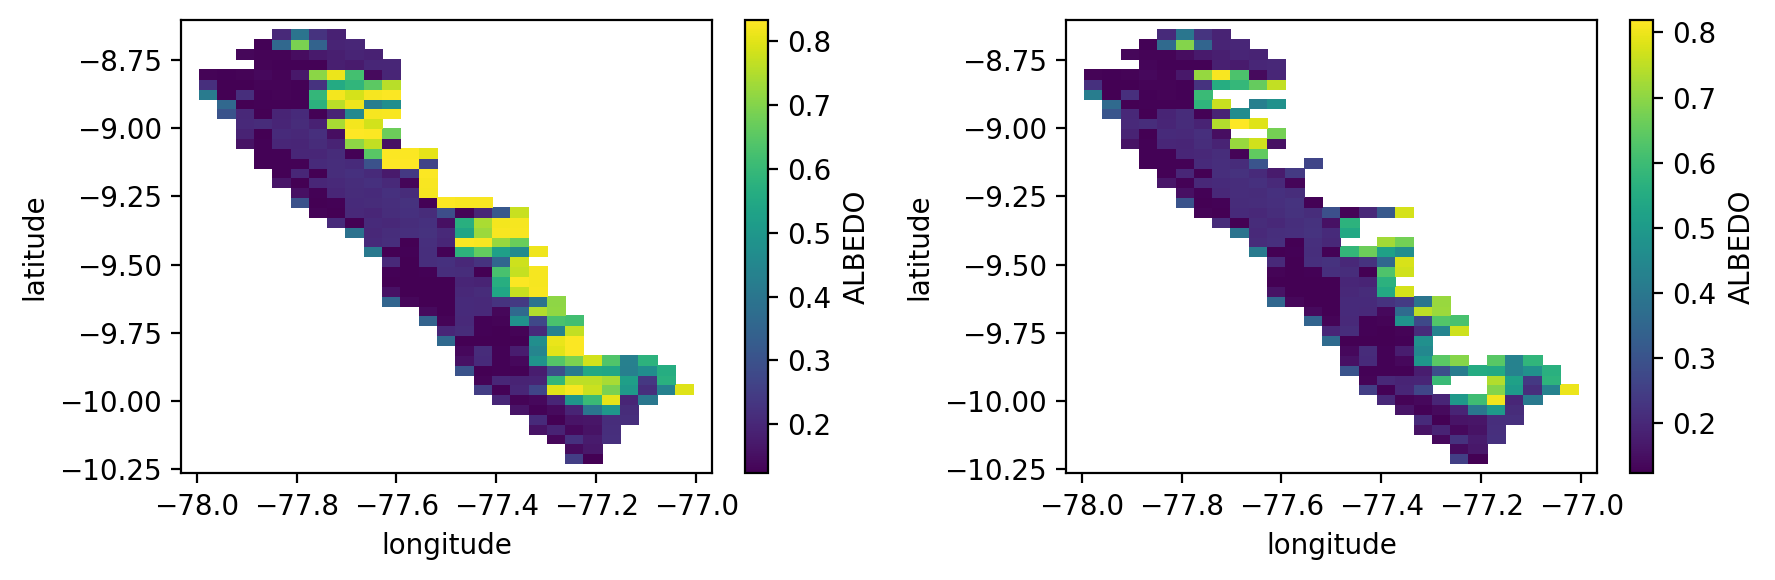

In [105]:
f = plt.figure(figsize=(9,3), dpi=200)
ax = f.add_subplot(121)
testwrf['ALBEDO'].sel(time=testwrf['time.month']==1).mean('time').plot()
ax = f.add_subplot(122)
testwrf['ALBEDO'].sel(time=testwrf['time.month']==1).mean('time').where(snowmask).plot()
plt.tight_layout()
f.savefig('/home/ck/rio_santa/timeseries/snowmask_example.jpg')

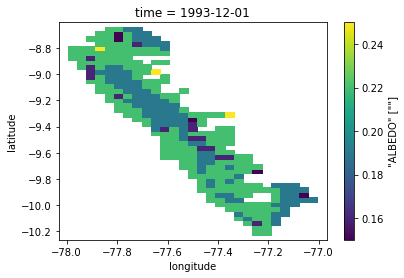

In [10]:
testwrf['ALBEDO'].isel(time=0).where(snowmask).plot()

In [11]:
import os
import ipdb

In [12]:
bcfiles_Rs = glob.glob('/media/ck/TOURO/WRF/BC_WRF/RioSanta/*_d02_RioSanta.nc')

In [13]:
bcfiles_Rs

['/media/ck/TOURO/WRF/BC_WRF/RioSanta/precip_finalcorrection_fixed_a_monthly_daily_d02_RioSanta.nc',
 '/media/ck/TOURO/WRF/BC_WRF/RioSanta/Tmax_finalcorrection_fixed_a_monthly_daily_d02_RioSanta.nc',
 '/media/ck/TOURO/WRF/BC_WRF/RioSanta/Tmin_finalcorrection_variable_a_monthly_daily_d02_RioSanta.nc']

In [16]:
#station point
for bc in bcfiles_Rs:
    ts = xr.open_dataset(bc)
    #ipdb.set_trace()
    print('Read', bc)
    ts = ts.where(snowmask).mean(['latitude', 'longitude'])
    print(ts.data_vars)
    if 'RAINNC' in ts.data_vars:
        ts = ts.rename({'RAINNC' : 'PRCP'})
    print(ts.data_vars)
    #ipdb.set_trace()
    comp = dict(zlib=True, complevel=5)
    encoding = {var: comp for var in ts.data_vars}
    
    fn = os.path.basename(bc)
    fn = fn.replace('.nc', '_fullValley_snowmask_BC.nc')
    ts.to_netcdf('/home/ck/rio_santa/timeseries/'+fn, mode='w', encoding=encoding, format='NETCDF4')
    
   # tsd = ts.resample('D')

Read /media/ck/TOURO/WRF/BC_WRF/RioSanta/precip_finalcorrection_fixed_a_monthly_daily_d02_RioSanta.nc
Data variables:
    RAINNC   (time) float32 7.444008 5.2110763 ... 0.121423215 1.4790387
Data variables:
    PRCP     (time) float32 7.444008 5.2110763 ... 0.121423215 1.4790387
Read /media/ck/TOURO/WRF/BC_WRF/RioSanta/Tmax_finalcorrection_fixed_a_monthly_daily_d02_RioSanta.nc
Data variables:
    T2       (time) float32 12.7472105 13.347374 ... 15.13562 15.679584
Data variables:
    T2       (time) float32 12.7472105 13.347374 ... 15.13562 15.679584
Read /media/ck/TOURO/WRF/BC_WRF/RioSanta/Tmin_finalcorrection_variable_a_monthly_daily_d02_RioSanta.nc
Data variables:
    T2       (time) float64 4.103 4.054 3.749 4.405 ... 4.319 4.171 3.51 3.811
Data variables:
    T2       (time) float64 4.103 4.054 3.749 4.405 ... 4.319 4.171 3.51 3.811


In [17]:
#station point
bcfiles_Rs = glob.glob('/media/ck/TOURO/WRF/BC_WRF/RioSanta/*_d02_RioSanta.nc')
for bc in bcfiles_Rs:
    ts = xr.open_dataset(bc)
    ts = ts.sel(latitude=huaraz_loc[1], longitude=huaraz_loc[0], method='nearest')
    if 'RAINNC' in ts.data_vars:
        ts = ts.rename({'RAINNC' : 'PRCP'})
    comp = dict(zlib=True, complevel=5)
    encoding = {var: comp for var in ts.data_vars}
    
    fn = os.path.basename(bc)
    fn = fn.replace('.nc', '_77W9S_BC.nc')
    ts.to_netcdf('/home/ck/rio_santa/timeseries/'+fn, mode='w', encoding=encoding, format='NETCDF4')
    
   # tsd = ts.resample('D')

In [72]:

r1 = xr.open_dataset('/home/ck/rio_santa/timeseries/wrfout_fullTS_fullValley_snowmask_d02.nc')
r2 = xr.open_dataset('/home/ck/rio_santa/timeseries/wrfout_fullTS_77W9S_d02.nc')
bc1 = xr.open_dataset('/home/ck/rio_santa/timeseries/precip_finalcorrection_fixed_a_monthly_daily_d02_RioSanta_fullValley_snowmask_BC.nc')
bc2 = xr.open_dataset('/home/ck/rio_santa/timeseries/precip_finalcorrection_fixed_a_monthly_daily_d02_RioSanta_77W9S_BC.nc')

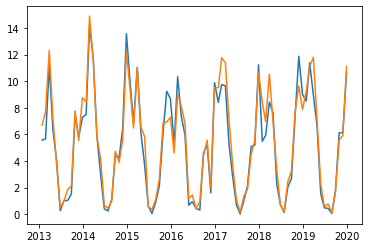

In [100]:
r2m = r2.sel(time=(r2['time.year']>=2013)&(r2['time.year']<=2019)).resample(time='1M').mean()
r1m = r1.sel(time=(r1['time.year']>=2013)&(r1['time.year']<=2019)).resample(time='1M').mean()

plt.plot(r2m.time, r2m['PRCP']*24)
plt.plot(r1m.time, r1m['PRCP']*24)

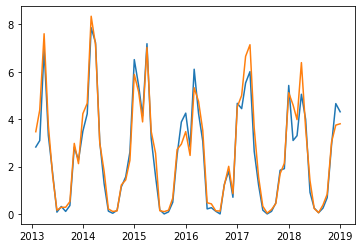

In [99]:
bc2m = bc2.sel(time=bc2['time.year']>=2013).resample(time='1M').mean()
bc1m = bc1.sel(time=bc1['time.year']>=2013).resample(time='1M').mean()

plt.plot(bc2m.time, bc2m['PRCP'])
plt.plot(bc1m.time, bc1m['PRCP'])

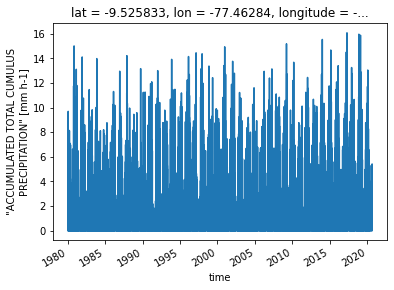

In [90]:
r2['PRCP'].plot()

In [38]:
import glob
import pandas as pd

In [66]:
bc1 = xr.open_dataset('/home/ck/rio_santa/timeseries/wrfout_fullTS_fullValley_snowmask_d02.nc')

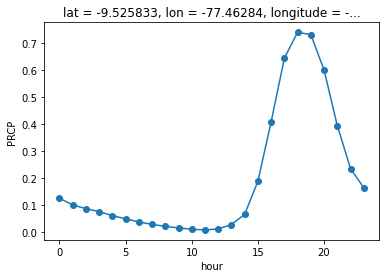

In [63]:
bc1['PRCP'].shift(time=-5).groupby('time.hour').mean().plot(marker='o')

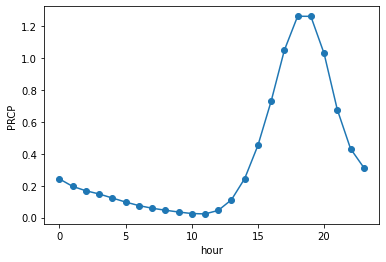

In [68]:
test = bc1['PRCP'].shift(time=-5)
test.sel(time=test['time.month']<=3).groupby('time.hour').mean().plot(marker='o')

In [11]:
bcfiles_Rs = glob.glob('/media/ck/TOURO/WRF/BC_WRF/RioSanta/*_d02_RioSanta.nc')


In [12]:
bcfiles_Rs

['/media/ck/TOURO/WRF/BC_WRF/RioSanta/precip_finalcorrection_fixed_a_monthly_daily_d02_RioSanta.nc',
 '/media/ck/TOURO/WRF/BC_WRF/RioSanta/Tmax_finalcorrection_fixed_a_monthly_daily_d02_RioSanta.nc',
 '/media/ck/TOURO/WRF/BC_WRF/RioSanta/Tmin_finalcorrection_variable_a_monthly_daily_d02_RioSanta.nc']

In [13]:
bc1 = xr.open_dataset(bcfiles_Rs[2])

In [14]:
bc1

<xarray.Dataset>
Dimensions:      (latitude: 46, longitude: 29, time: 14245)
Coordinates:
  * latitude     (latitude) float32 -10.247986 -10.211914 ... -8.657249 -8.62101
  * longitude    (longitude) float32 -78.01261 -77.97596 ... -77.02301 -76.98636
    lat          (latitude, longitude) float32 ...
    lon          (latitude, longitude) float32 ...
  * time         (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31
    month        (time) int64 ...
    south_north  (latitude) float64 ...
    west_east    (longitude) float64 ...
Data variables:
    RAINNC       (time, latitude, longitude) float32 ...
Attributes:
    TITLE:                            OUTPUT FROM WRF V3.8.1 MODEL
    START_DATE:                      1982-12-01_00:00:00
    SIMULATION_START_DATE:           1982-12-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        88
    SOUTH-NORTH_GRID_DIMENSION:      94
    BOTTOM-TOP_GRID_DIMENSION:       35
    DX:                              4000.0
    DY:                              4000.0
    SKEBS_ON:                        0
    SPEC_BDY_FINAL_MU:               1
    USE_Q_DIABATIC:                  0
    GRIDTYPE:                        C
    DIFF_OPT:                        2
    KM_OPT:                          4
    DAMP_OPT:                        3
    DAMPCOEF:                        0.2
    KHDIF:                           0.0
    KVDIF:                           0.0
    MP_PHYSICS:                      10
    RA_LW_PHYSICS:                   3
    RA_SW_PHYSICS:                   3
    SF_SFCLAY_PHYSICS:               1
    SF_SURFACE_PHYSICS:              4
    BL_PBL_PHYSICS:                  5
    CU_PHYSICS:                      0
    SF_LAKE_PHYSICS:                 0
    SURFACE_INPUT_SOURCE:            1
    SST_UPDATE:                      1
    GRID_FDDA:                       0
    GFDDA_INTERVAL_M:                0
    GFDDA_END_H:                     0
    GRID_SFDDA:                      0
    SGFDDA_INTERVAL_M:               0
    SGFDDA_END_H:                    0
    HYPSOMETRIC_OPT:                 2
    USE_THETA_M:                     0
    SF_URBAN_PHYSICS:                0
    SHCU_PHYSICS:                    0
    MFSHCONV:                        0
    FEEDBACK:                        0
    SMOOTH_OPTION:                   0
    SWRAD_SCAT:                      1.0
    W_DAMPING:                       0
    ADAPT_DT_START:                  24.0
    ADAPT_DT_MAX:                    48.0
    ADAPT_DT_MIN:                    12.0
    RADT:                            4.0
    BLDT:                            0.0
    CUDT:                            0.0
    AER_OPT:                         0
    SWINT_OPT:                       0
    AER_TYPE:                        1
    AER_AOD550_OPT:                  1
    AER_ANGEXP_OPT:                  1
    AER_SSA_OPT:                     1
    AER_ASY_OPT:                     1
    AER_AOD550_VAL:                  0.12
    AER_ANGEXP_VAL:                  1.3
    AER_SSA_VAL:                     1e-45
    AER_ASY_VAL:                     1e-45
    MOIST_ADV_OPT:                   1
    SCALAR_ADV_OPT:                  1
    TKE_ADV_OPT:                     1
    DIFF_6TH_OPT:                    2
    DIFF_6TH_FACTOR:                 0.12
    OBS_NUDGE_OPT:                   0
    BUCKET_MM:                       -1.0
    BUCKET_J:                        -1.0
    PREC_ACC_DT:                     0.0
    SF_OCEAN_PHYSICS:                0
    ISFTCFLX:                        0
    ISHALLOW:                        0
    ISFFLX:                          1
    ICLOUD:                          1
    ICLOUD_CU:                       0
    TRACER_PBLMIX:                   1
    SCALAR_PBLMIX:                   0
    YSU_TOPDOWN_PBLMIX:              0
    GRAV_SETTLING:                   0
    OPT_SFC:                         1
    DVEG:                            4
    OPT_CRS:                         1
    OPT_BTR:                         1
    OPT_